# FailureSense – Clustering Analysis

Objective:
- Identify hidden patterns in machine operating conditions
- Apply unsupervised clustering techniques
- Analyze structure in sensor data without using failure labels


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv(r"D:\FailureSense_MLProj\failuresense\data\raw\ai4i2020.csv")

In [4]:
CLUSTER_FEATURES = [
    "Air temperature [K]",
    "Process temperature [K]",
    "Rotational speed [rpm]",
    "Torque [Nm]",
    "Tool wear [min]"
]

X = df[CLUSTER_FEATURES]


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## K-Means Clustering

Elbow method (explicit requirement)

In [6]:
inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)


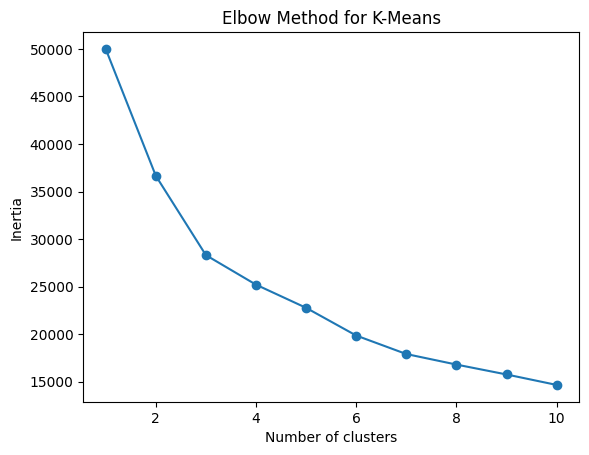

In [7]:
plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()


train k-means

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_km = kmeans.fit_predict(X_scaled)


In [9]:
df["KMeans_Cluster"] = clusters_km


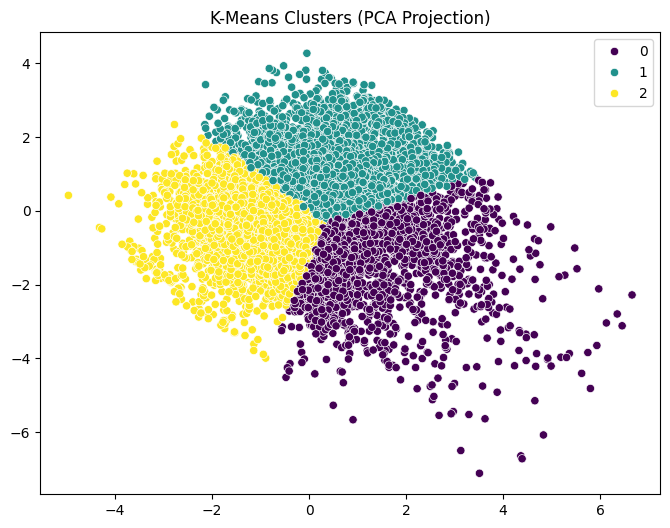

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=clusters_km,
    palette="viridis"
)
plt.title("K-Means Clusters (PCA Projection)")
plt.show()


## K-Means Observations

- Clusters represent distinct operating regimes
- Separation suggests varying machine load and wear conditions
- Some clusters may correspond to higher stress environments


## Hierarchical Clustering

Train Agglomerative Clustering

In [11]:
hierarchical = AgglomerativeClustering(n_clusters=3)
clusters_hc = hierarchical.fit_predict(X_scaled)

df["Hierarchical_Cluster"] = clusters_hc


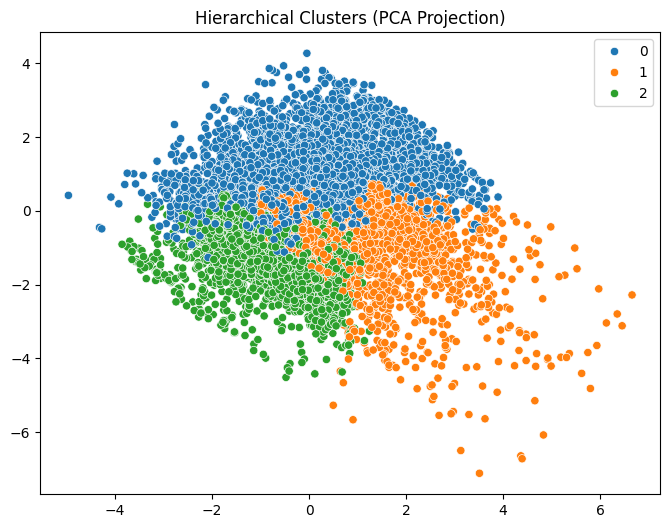

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=clusters_hc,
    palette="tab10"
)
plt.title("Hierarchical Clusters (PCA Projection)")
plt.show()


## Hierarchical Clustering Observations

- Produces similar high-level grouping to K-Means
- More flexible cluster shapes
- Useful for understanding nested structure in data
